20210130l_m2km.fits

creating gammas
 - 50 polychromatic turbulence layers from 0 to 50 km
 - time: 1.31
approxing
 - initial guess for the parameters:
 Vx, m/s  Vy, m/s          Cn2     z, m
   -0.03     0.02 1.099035e-13  1967.46
   -6.38    -6.27 6.570915e-13  3191.94
   -4.69    -2.26 5.098360e-13  3235.78
  -11.04   -10.69 2.121346e-13  9837.04
  -17.26   -16.99 1.101087e-12 10657.37
residual for initial guess:1.0006709847076736
 - found params:
 Vx, m/s  Vy, m/s          Cn2     z, m
   -0.03     0.02 1.099035e-13  1967.46
   -6.38    -6.27 6.570915e-13  3191.94
   -4.69    -2.26 5.098360e-13  3235.78
  -11.04   -10.69 2.121346e-13  9837.04
  -17.26   -16.99 1.101087e-12 10657.37
 - total Cn2: 2.59005256e-12
 - seeing, 650 nm: 2.11
(2, 452, 452)
total residual:1.0006709847076736
 - time: 0.71


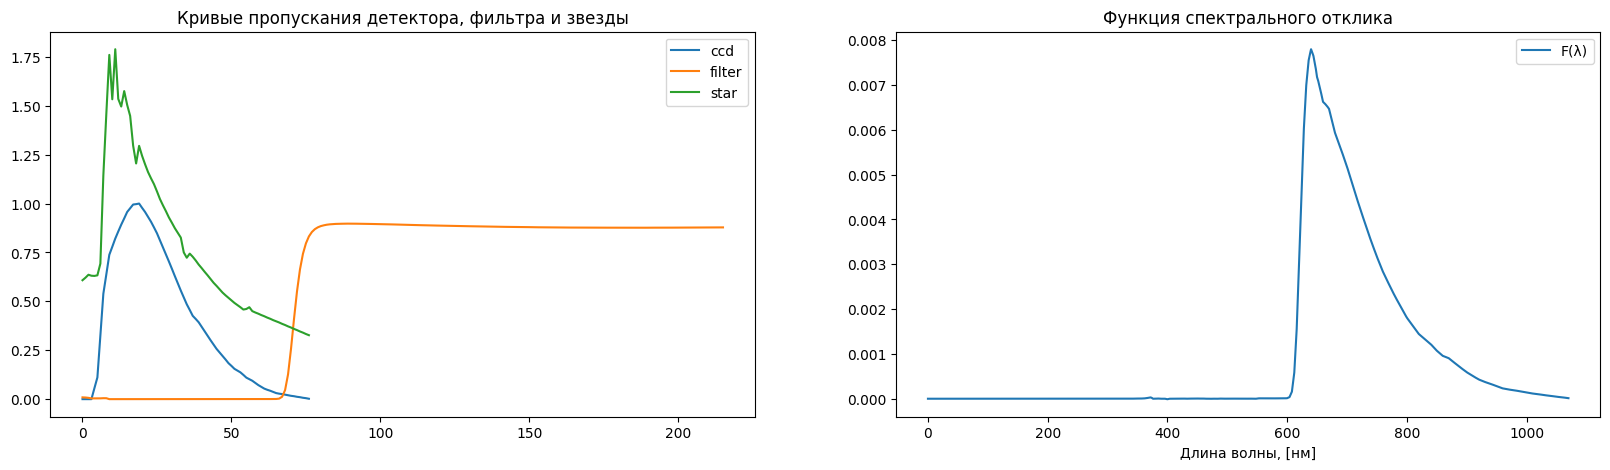

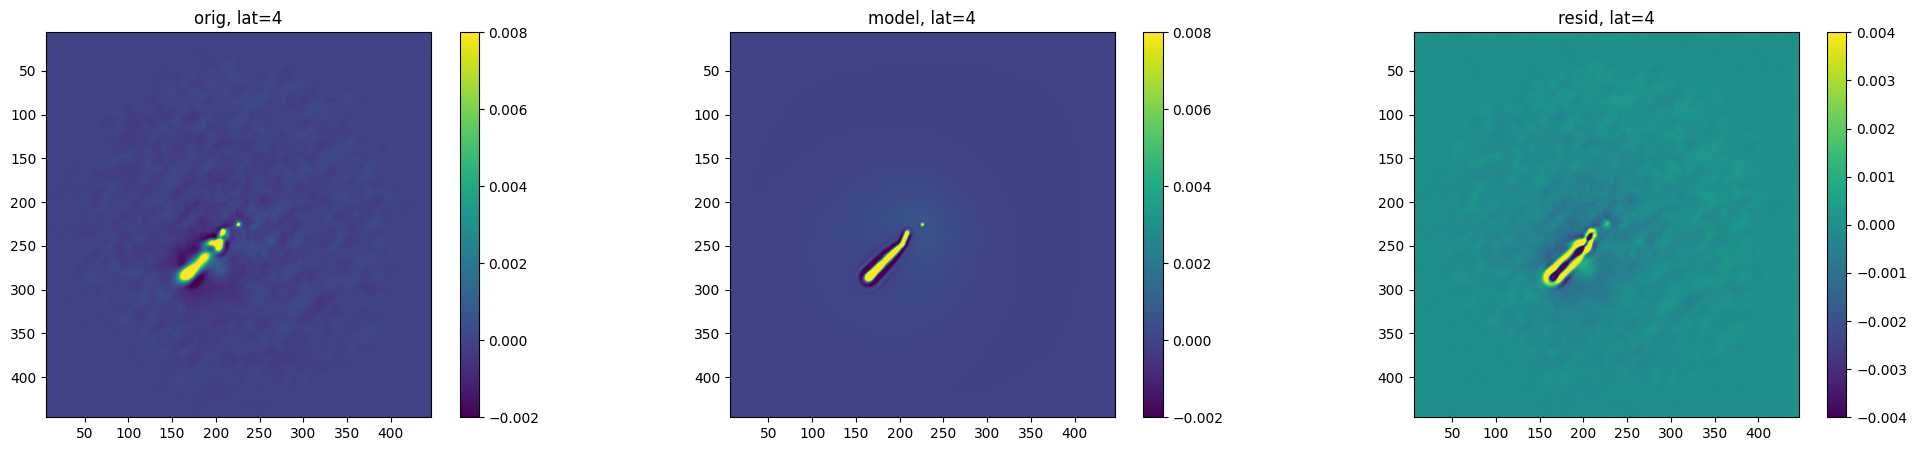

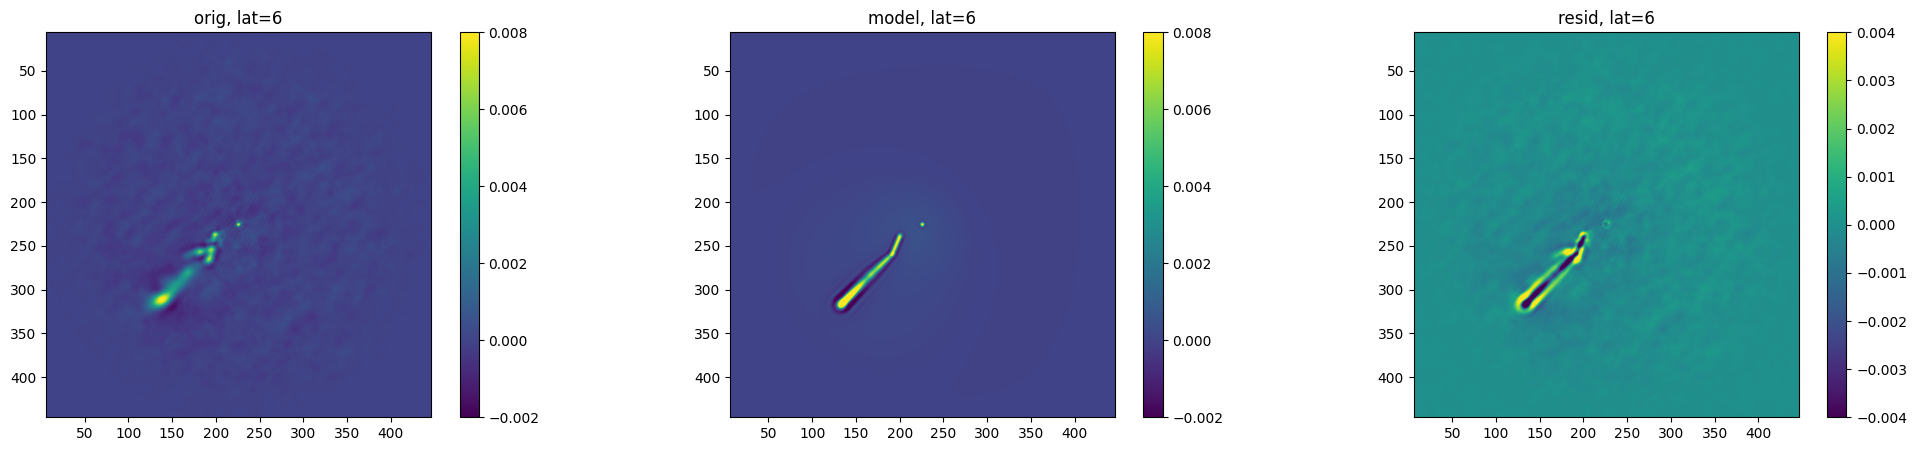

In [1]:
from main import processDomecam

file = '20210130l_m2km.fits'
file_bias = 'bias20210130.fits'
data_dir = '/home/safonov/KGO/domecam/' # рабочая папка, все исходные файлы должны храниться в ней

'''
удоствовериться, что деление на cjk работает корректно
    - можно будет параметр sigma в curve fit передавать для этой области
        большие значения, чтобы "круг" занулялся

если я делаю cc/cjk то при создании гамм наверное не нужно делать res = res * cjk
'''

latency = [4, 6] # задержка для кросс-корреляции, [кадр]
conjugated_distance = 2 # сопряженное расстояние, [километр]
D = 2.5 # диаметр телескопа, [метр]
spectrum = 'poly' # тип излучения
lambda_ = 650*1e-9 # длина наблюдаемой волны света, [метр]
 
use_gradient = True # БС: использовать ли градиенты между слоями

# для полихроматического излучения нужны кривые фильтра, детектора и звезды
file_filter = 'KC19_d16t4_Safonov.xls'
file_ccd = 'ccd_prosilica2.crv'
file_star = 'a05.sp'

# БС: если параметр do_fitting равен False: отладочный режим, аппроксимация не будет выполнена, а будут взяты начальные параметры initial_params
# БС: если параметр do_fitting равен True, то будет выполнена оценка начальных параметров и проведена аппроксимация
do_fitting = True

# начальные параметры для аппроксимации в явном виде
# если их не указать, то они будут подобраны автоматически
# initial_params = [[-0.17  ,  -0.14, 3.101416e-1,  2.02597, ],
#                   [-8.45  ,  -5.64 ,2.907178e-1 ,  8.36980,],
#                   [-5.69  ,  -5.53 ,3.762436e-1 ,  9.24122,],
#                   [-5.77  ,  -7.27 ,4.233664e-1 ,  9.42269,],
#                   [-4.84  ,  -1.88 ,4.869913e-1 , 10.17899,],
#                   [-10.91 ,  -10.40, 4.678400e-1, 10.36828,],
#                   [-16.41 ,  -16.21, 14.218462,    13.27173 ]]

initial_params = [[   -0.03 ,    0.02, 2*0.5495173, 1.96746],
                  [   -4.69 ,   -2.26, 5*1.019672,  3.23578],
                  [   -6.38 ,   -6.27, 5*1.314183,  3.19194],
                  [  -11.04 ,  -10.69, 2*1.060673,  9.83704],
                  [  -17.26 ,  -16.99, 3*3.670290, 10.65737]]
#initial_params = None
 
processDomecam(file=file, file_bias=file_bias, data_dir=data_dir, 
               D=D, conjugated_distance=conjugated_distance, latency=latency,
               spectrum=spectrum, lambda_=lambda_, file_filter=file_filter, file_ccd=file_ccd, file_star=file_star,
               do_fitting=do_fitting, use_gradient=use_gradient, initial_params=initial_params)